In [3]:
import numpy as np
import cpnest.model
import corner
import pandas as pd
import matplotlib.pyplot as plt

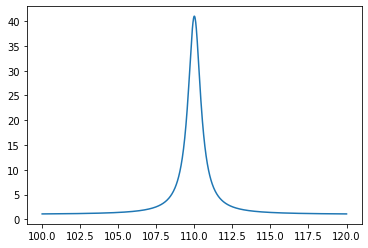

In [36]:
npts = 1000
f = np.linspace(100, 120, npts)
nu = 110.0
height = 10.0
lw = 1.0
lim = height / ((lw/2.0)**2 + (nu - f)**2) + 1.0

plt.plot(f, lim)

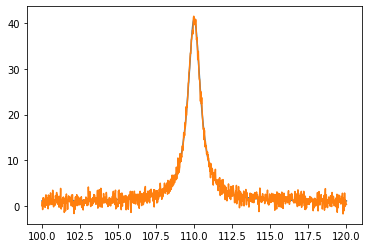

In [37]:
p = lim + np.random.randn(npts)

plt.plot(f, lim)
plt.plot(f, p)

In [50]:
class SimpleModel(cpnest.model.Model):
    """
    A simple Lorentzian model
    """
    names=['nu', 'h', 'lw']
    bounds=[[100,120],[0, 100], [0,10]]
    
    def set_frequency(self, f):
        self.f = f
        
    def set_power(self, p):
        self.p = p
    
    def model(self, param):
        return param['h'] / ((param['lw']/2.0)**2 + (param['nu'] - self.f)**2) + 1.0
    
    def log_likelihood(self, param):
        resid = self.model(param) - self.p
        return np.sum(-0.5*(resid**2) - np.log(2.0*np.pi))

In [52]:
%%time
mymodel = SimpleModel()
mymodel.set_frequency(f)
mymodel.set_power(p)
nest = cpnest.CPNest(mymodel, nlive=1000)
nest.run()

2020-03-17, 11:18:45 - CPNest  : Running with 4 parallel threads
2020-03-17, 11:18:59 - CPNest  : Sampler process 14206: MCMC samples accumulated = 0
2020-03-17, 11:18:59 - CPNest  : Sampler process 14209: MCMC samples accumulated = 0
2020-03-17, 11:18:59 - CPNest  : Sampler process 14208: MCMC samples accumulated = 0
2020-03-17, 11:18:59 - CPNest  : Sampler process 14207: MCMC samples accumulated = 0
2020-03-17, 11:18:59 - CPNest  : Sampler process 14209 - mean acceptance 0.547: exiting
2020-03-17, 11:18:59 - CPNest  : Sampler process 14206 - mean acceptance 0.557: exiting
2020-03-17, 11:18:59 - CPNest  : Sampler process 14208 - mean acceptance 0.542: exiting
2020-03-17, 11:19:00 - CPNest  : Sampler process 14207 - mean acceptance 0.542: exiting
2020-03-17, 11:19:00 - CPNest  : Final evidence: -2348.58
2020-03-17, 11:19:00 - CPNest  : Information: 19.73
2020-03-17, 11:19:02 - CPNest  : Computed log_evidences: (-2348.5932857115704,)
2020-03-17, 11:19:02 - CPNest  : Relative weights of 

CPU times: user 6.13 s, sys: 409 ms, total: 6.54 s
Wall time: 16.9 s


In [53]:
import pandas as pd
df = pd.DataFrame(nest.get_posterior_samples())
df.head()

2020-03-17, 11:19:22 - CPNest  : Computed log_evidences: (-2348.5932857115704,)
2020-03-17, 11:19:22 - CPNest  : Relative weights of input files: [1.0]
2020-03-17, 11:19:22 - CPNest  : Relative weights of input files taking into account their length: [1.0]
2020-03-17, 11:19:23 - CPNest  : Number of input samples: [24584]
2020-03-17, 11:19:23 - CPNest  : Expected number of samples from each input file [3230]
2020-03-17, 11:19:23 - CPNest  : Samples produced: 3230


,nu,h,lw,logL,logPrior
0,109.992165,9.638074,0.981781,-2336.922116,0.0
1,110.006177,9.606593,0.980736,-2335.888718,0.0
2,109.989536,10.167909,1.014322,-2335.511468,0.0
3,110.004193,10.005729,0.992933,-2335.487745,0.0
4,109.994246,10.425544,1.023716,-2335.358678,0.0


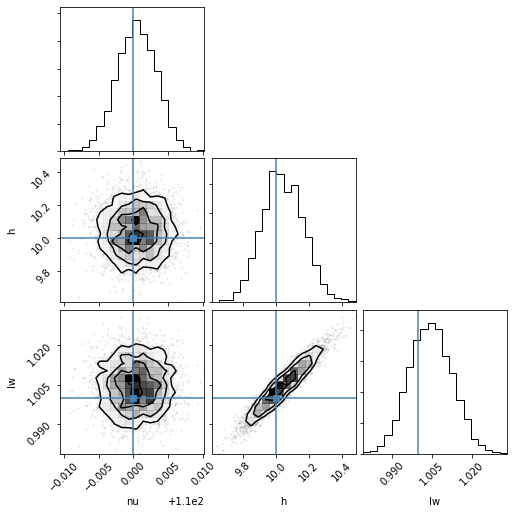

In [54]:
import corner 
corner.corner(df[['nu', 'h', 'lw']], truths=[nu, height, lw]);